So, begin with data preparation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

dataFrame = pd.read_csv("./dataset.csv",sep=";",encoding="cp1251",decimal=",",na_values=[""],keep_default_na=False)

dataFrame.head()


,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580.000000,1580.0,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


In [2]:
#Separate target and input + Check if there are any missings
y=dataFrame[dataFrame.columns[1]]
X=dataFrame[dataFrame.columns[2:]]
print(pd.isnull(X).sum())


def MakeBarChart(X,Y,title,figsize=(10,8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=14, fontweight='bold')
    sb.set_style("whitegrid")

    sb.set_context("talk")
    ax = sb.barplot(x=X, y=Y)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()
    

AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   1367
GEN_TITLE                      1367
ORG_TP_STATE                   1367
ORG_TP_FCAPITAL                1365
JOB_DIR                        1367
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     295
REGION_NM                         1
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL                    0
OWN_AUTO                          0
AUTO_RUS_FL                 

Trying GEN_INDUSTRY
Got numbers


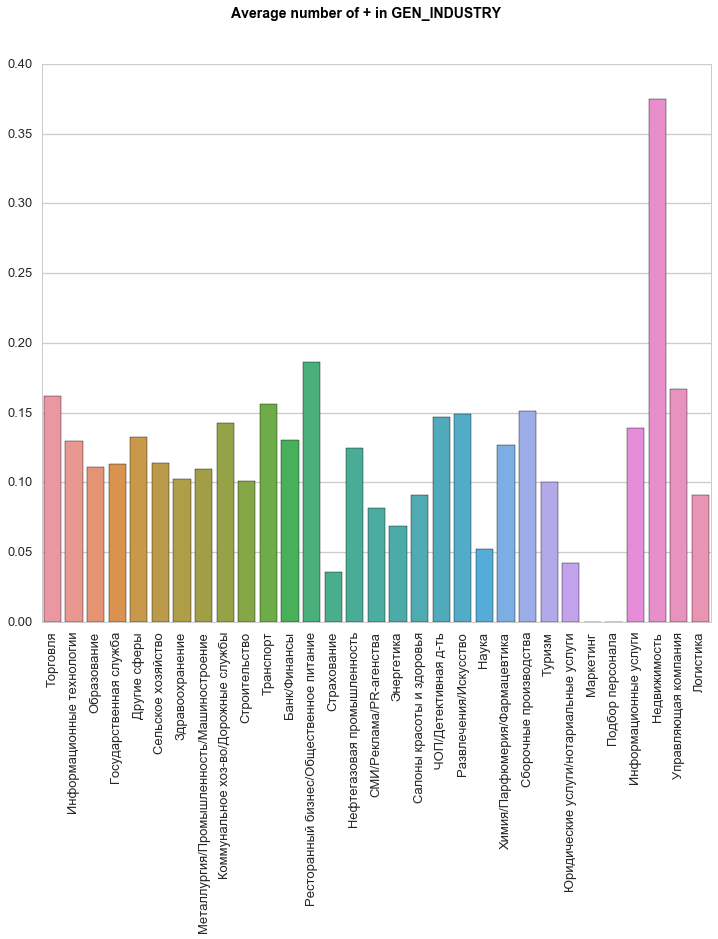

Trying GEN_TITLE
Got numbers


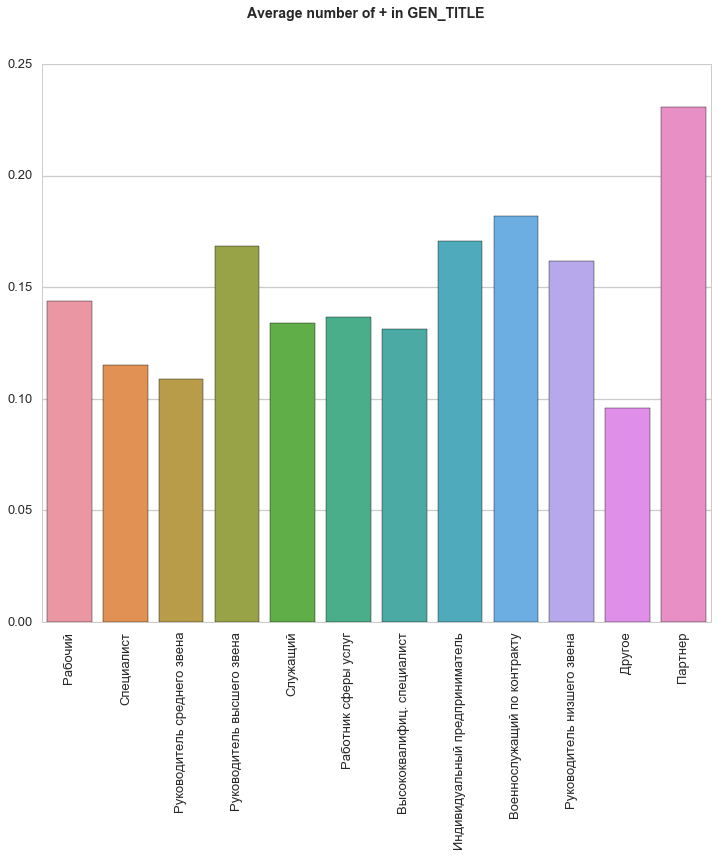

Trying ORG_TP_STATE
Got numbers


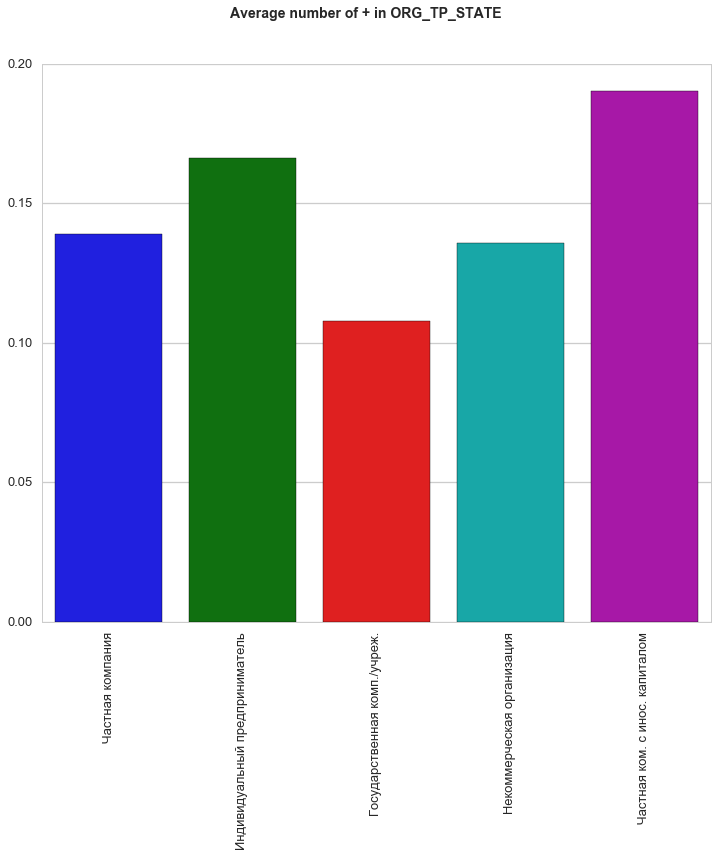

Trying ORG_TP_FCAPITAL
Got numbers


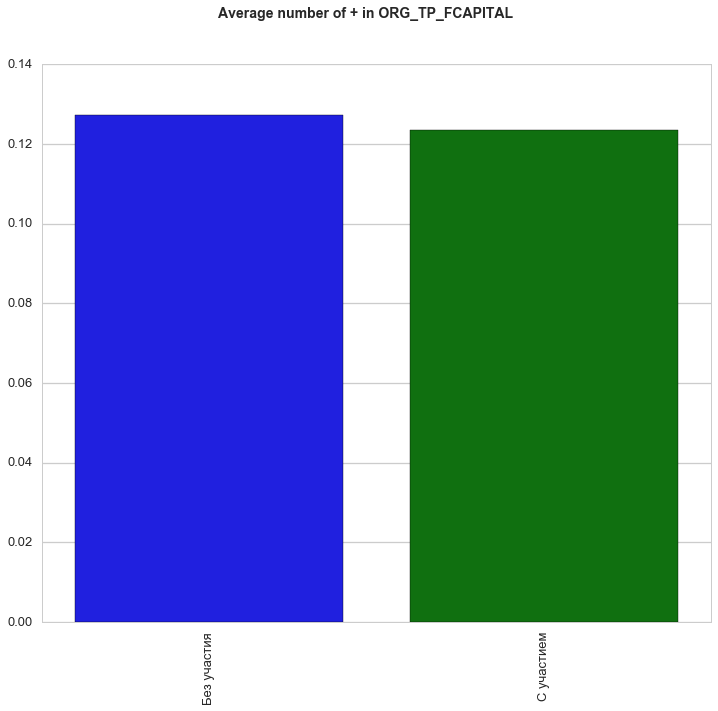

Trying JOB_DIR
Got numbers


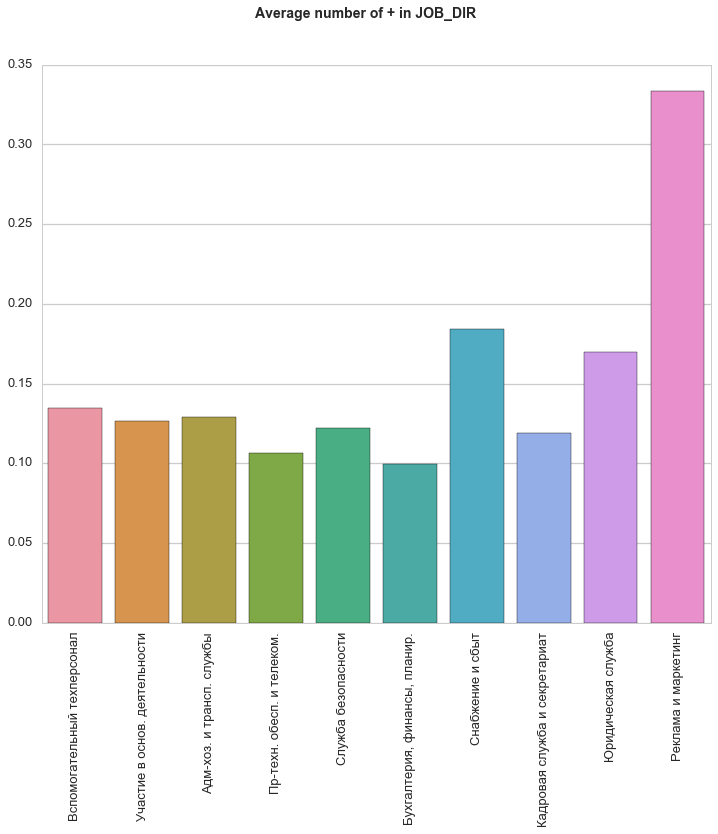

Trying TP_PROVINCE
Got numbers


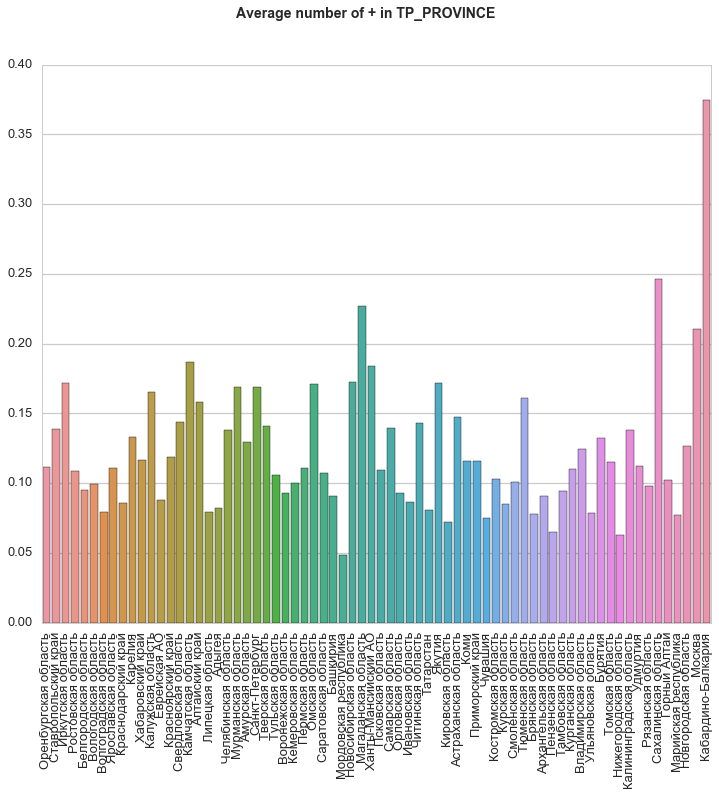

Trying REGION_NM
Got numbers


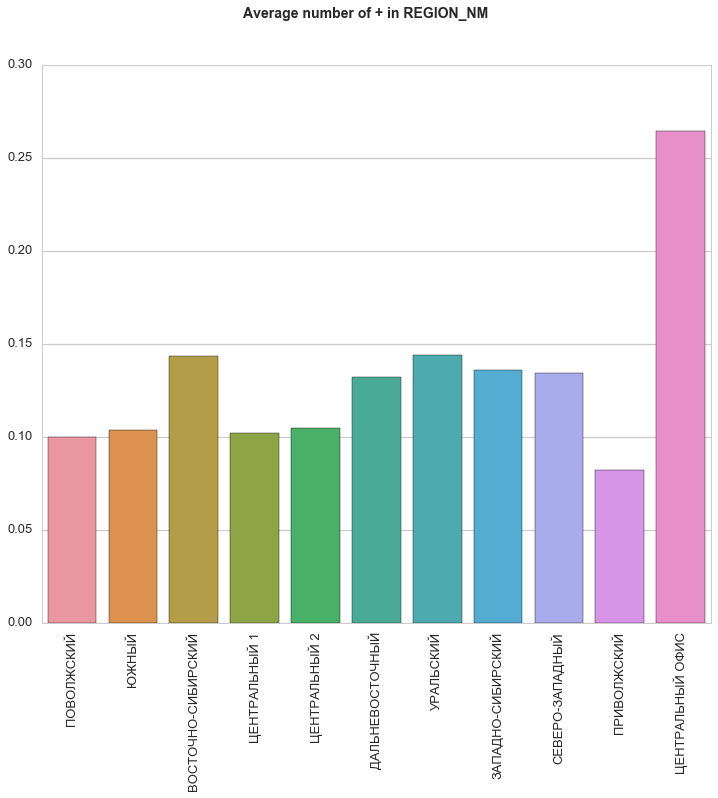

In [3]:
barplots=["GEN_INDUSTRY","GEN_TITLE","ORG_TP_STATE","ORG_TP_FCAPITAL","JOB_DIR","TP_PROVINCE","REGION_NM"]
#WORK_TIME, FCT_LIVING_TERM are dropped because they are not realistic


for el in barplots:
    print("Trying "+el)
    cats=pd.unique(X[el])
    
    catsSizes=[np.sum([int(X[el][n]==cats[k]) for n in range(0,len(X[el]))]) for k in range(0,len(cats))]
    catsMasks = [X[el]==cats[k] for k in range(0,len(cats))]
    positives=[np.sum(y[catsMasks[k]])/catsSizes[k] for k in range(0,len(cats))]
    print("Got numbers")
    #print(positives)
    #print(cats)
    MakeBarChart(cats,positives,"Average number of + in "+el,figsize=(12,10))
    
  

In [4]:
X_1=X[X.columns[list(range(0,37))+list(range(39,50))]]

y=y[~pd.isnull(X_1['REGION_NM'])]
X_1 = X_1[~pd.isnull(X_1['REGION_NM'])]
#transform last column NAN to 0
pd.unique(X_1['REGION_NM'])

array(['ПОВОЛЖСКИЙ', 'ЮЖНЫЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'ЦЕНТРАЛЬНЫЙ 1',
       'ЦЕНТРАЛЬНЫЙ 2', 'ДАЛЬНЕВОСТОЧНЫЙ', 'УРАЛЬСКИЙ',
       'ЗАПАДНО-СИБИРСКИЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ПРИВОЛЖСКИЙ',
       'ЦЕНТРАЛЬНЫЙ ОФИС'], dtype=object)

In [5]:

from sklearn import preprocessing

X_1["PREVIOUS_CARD_NUM_UTILIZED"][pd.isnull(X_1["PREVIOUS_CARD_NUM_UTILIZED"])]=0
X_1["GEN_INDUSTRY"][pd.isnull(X_1["GEN_INDUSTRY"])]="NaN"  
X_1["GEN_TITLE"][pd.isnull(X_1["GEN_TITLE"])]="NaN" 
X_1["ORG_TP_STATE"][pd.isnull(X_1["ORG_TP_STATE"])]="NaN" 
X_1["ORG_TP_FCAPITAL"][pd.isnull(X_1["ORG_TP_FCAPITAL"])]="NaN" 
X_1["JOB_DIR"][pd.isnull(X_1["JOB_DIR"])]="NaN" 
X_1["TP_PROVINCE"][pd.isnull(X_1["TP_PROVINCE"])]="NaN" 

cat_features_mask = (X_1.dtypes=="object").values
# кодирование категорий-строк натуральными числами
label_enc = preprocessing.LabelEncoder()
for feature in X_1.columns[cat_features_mask]: 
    print(feature)
    X_1[feature] = label_enc.fit_transform(X_1[feature])


# применение one-hot ecnoding
enc = preprocessing.OneHotEncoder(sparse=False)
X_cat_np = enc.fit_transform(X_1[X_1.columns[cat_features_mask]])
X_cat_pd = pd.DataFrame(data=X_cat_np)

X_cat_pd.head()

 

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM


,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
X_cat_pd.drop(enc.feature_indices_[:-1], axis=1, inplace=True)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
sel=SelectKBest(mutual_info_classif, k=200).fit(X_cat_pd, y)
X_sel = sel.transform(X_cat_pd)
X_sel.shape

(15222, 200)

In [8]:
(sel.scores_>0.0001).sum()

192

In [29]:
from sklearn.metrics import roc_curve, auc

def PlotROC(clf,X_train,X_test,y_train,y_test,n_classes=1):
    y_score = clf.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        if(n_classes==1):
            fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
        else:
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.title('Receiver operating characteristic example')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    colors=['darkorange','red','blue','yellow']
    for i in range(0,n_classes):
        lw = 2
        plt.plot(fpr[i], tpr[i], color=colors[i],
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

        plt.legend(loc="lower right")

    plt.show()
    


from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=175)
ipca.fit(X_sel)
X_sel_pca1=ipca.transform(X_sel) 
ipca.singular_values_

array([ 83.17521698,  68.8667716 ,  61.19103373,  58.2154762 ,
        54.25294642,  52.92597104,  49.22805043,  47.74378521,
        46.20249385,  43.73396669,  42.61379586,  41.27844829,
        39.85019746,  38.37210881,  36.11878838,  35.18693056,
        33.82827898,  33.32161819,  31.10267623,  30.3031786 ,
        29.34586625,  28.20880893,  27.71608898,  27.40936146,
        26.7515307 ,  26.32109247,  26.00110308,  25.26398769,
        24.8234092 ,  24.77725882,  24.64996799,  24.5989346 ,
        24.46326607,  24.18189422,  23.46025189,  23.3470526 ,
        23.14632151,  22.84116874,  22.60629001,  22.33110871,
        22.138332  ,  21.56003303,  21.38724738,  21.30798423,
        21.22622632,  20.92247337,  20.66449895,  20.55633176,
        20.25175703,  20.07408762,  19.88099924,  19.77944955,
        19.21061393,  19.19121275,  18.61742845,  18.45498905,
        18.35125369,  18.13823676,  17.61387192,  17.48299723,
        17.12461499,  17.08744091,  16.74441498,  16.73

Acc: [ 0.81158849  0.81888057  0.81631849]
Prec: [ 0.1437247   0.14446953  0.13876652]
Rec: [ 0.11754967  0.10596026  0.10430464]
F1: [ 0.12932605  0.12225406  0.11909263]
ROCAUC: [ 0.51472584  0.52005034  0.5165674 ]


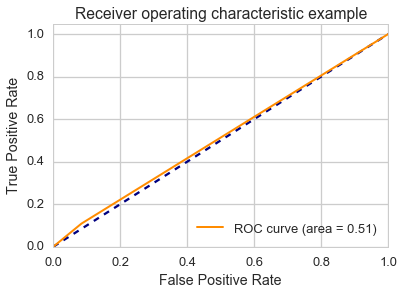

In [36]:
# the record is 0.69 auc
from sklearn.model_selection import cross_val_score#no difference btw using pca and without it
from sklearn.tree import DecisionTreeClassifier #accuracy is about 0.8, rocauc is about 0.5 and might be better
clf = DecisionTreeClassifier(random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.4, random_state=0)

accScores=cross_val_score(clf, X_sel, y, cv=3,scoring='accuracy')
precScores=cross_val_score(clf, X_sel, y, cv=3,scoring='precision')
recScores=cross_val_score(clf, X_sel, y, cv=3,scoring='recall')
f1Scores=cross_val_score(clf, X_sel, y, cv=3,scoring='f1')
rocaucScores=cross_val_score(clf, X_sel, y, cv=3,scoring='roc_auc')

print("Acc: "+str(accScores))
print("Prec: "+str(precScores))
print("Rec: "+str(recScores))
print("F1: "+str(f1Scores))
print("ROCAUC: "+str(rocaucScores))

PlotROC(clf,X_train,X_test,y_train,y_test)

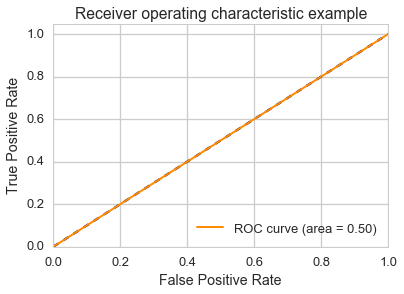

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn import svm #no difference btw using pca and without it
clf = svm.SVC(random_state=0,kernel='linear')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.4, random_state=0)

#accScores=cross_val_score(clf, X_sel, y, cv=3,scoring='accuracy')
#precScores=cross_val_score(clf, X_sel, y, cv=3,scoring='precision')
#recScores=cross_val_score(clf, X_sel, y, cv=3,scoring='recall')
#1Scores=cross_val_score(clf, X_sel, y, cv=3,scoring='f1')
#ocaucScores=cross_val_score(clf, X_sel, y, cv=3,scoring='roc_auc')

#print("Acc: "+str(accScores))
#print("Prec: "+str(precScores))
#print("Rec: "+str(recScores))
#print("F1: "+str(f1Scores))
#print("ROCAUC: "+str(rocaucScores))
PlotROC(clf,X_train,X_test,y_train,y_test)

[ 0.57996329  0.5699269   0.57929681  0.58501325  0.58937216  0.59379081
  0.60063818  0.58422633  0.62108141  0.62281179]
[ 0.86277085  0.85620486  0.86202365  0.85085414  0.86005256  0.86333771
  0.87187911  0.87187911  0.87122208  0.86596583]
[ 0.25454545  0.20634921  0.23636364  0.15151515  0.19230769  0.23529412
  0.25        0.325       0.30769231  0.28301887]
[ 0.07692308  0.07142857  0.0718232   0.05524862  0.05524862  0.06629834
  0.03867403  0.0718232   0.06629834  0.08287293]
[ 0.11814346  0.10612245  0.11016949  0.08097166  0.08583691  0.10344828
  0.06698565  0.11764706  0.10909091  0.12820513]


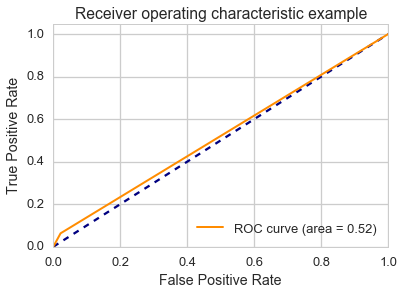

In [34]:
from sklearn.naive_bayes import BernoulliNB#the best by rocauc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.4, random_state=0)

clf=BernoulliNB()
print(cross_val_score(clf,X_sel,y,cv=10,scoring="roc_auc"))
print(cross_val_score(clf,X_sel,y,cv=10,scoring="accuracy"))
print(cross_val_score(clf,X_sel,y,cv=10,scoring="precision"))
print(cross_val_score(clf,X_sel,y,cv=10,scoring="recall"))
print(cross_val_score(clf,X_sel,y,cv=10,scoring="f1"))

PlotROC(clf,X_train,X_test,y_train,y_test)

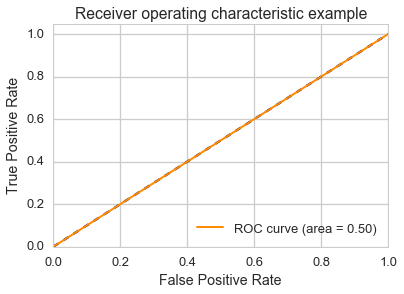

In [45]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel_pca1, y, test_size=0.4, random_state=0)

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(160,150,40), max_iter=10, alpha=1e-4,
                    solver='lbfgs', tol=1e-4, random_state=1,
                    learning_rate_init=.1)

PlotROC(clf,X_train,X_test,y_train,y_test)
    
#print(cross_val_score(clf,X_sel,y,cv=10,scoring="roc_auc"))
#print(cross_val_score(clf,X_sel,y,cv=10,scoring="accuracy"))
#print(cross_val_score(clf,X_sel,y,cv=10,scoring="precision"))
#print(cross_val_score(clf,X_sel,y,cv=10,scoring="recall"))
#print(cross_val_score(clf,X_sel,y,cv=10,scoring="f1"))
